In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers

## Loading data

In [17]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

## Analyzing data

In [18]:
train_data.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [19]:
train_data["keyword"].value_counts().head(3)

keyword
fatalities    45
deluge        42
armageddon    42
Name: count, dtype: int64

In [20]:
train_data["location"].value_counts().head(3)

location
USA              104
New York          71
United States     50
Name: count, dtype: int64

In [21]:
def clean_data(data:pd.DataFrame):
    data.drop(columns=["location", "id"], inplace=True)
    data.fillna("",inplace=True)    

clean_data(train_data)
clean_data(test_data)

In [22]:
train_labels = train_data.pop("target")

In [23]:
train_data.head(3)

,keyword,text
0,,Our Deeds are the Reason of this #earthquake M...
1,,Forest fire near La Ronge Sask. Canada
2,,All residents asked to 'shelter in place' are ...


In [24]:
train_data.head(3)

,keyword,text
0,,Our Deeds are the Reason of this #earthquake M...
1,,Forest fire near La Ronge Sask. Canada
2,,All residents asked to 'shelter in place' are ...


In [25]:
print(f'No disaster: {train_data[train_labels == 0]["text"].values[1]}')
print(f'Disaster: {train_data[train_labels == 1]["text"].values[1]}')

No disaster: I love fruits
Disaster: Forest fire near La Ronge Sask. Canada


In [26]:
print("Train shape:",train_data.shape)
print("Test shape:",test_data.shape)

Train shape: (7613, 2)
Test shape: (3263, 2)


In [27]:
train_labels.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

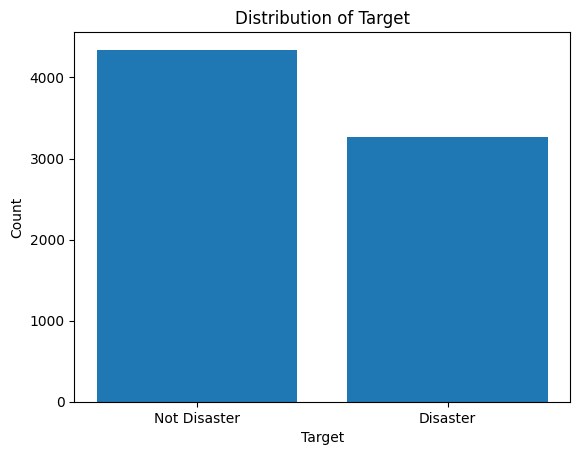

In [28]:
target_counts = train_labels.value_counts()

# Create a bar plot
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(target_counts.index, ['Not Disaster', 'Disaster'])
plt.title('Distribution of Target')
plt.show()

In [46]:
train_data['text'] + train_data['keyword']

((train_data['text'] + train_data['keyword'])[train_data['keyword']!=""])[7578]

'@jt_ruff23 @cameronhacker and I wrecked you bothwrecked'

In [47]:
train_data['keyword'][7578]

'wrecked'

In [49]:
import re

def substitute_links(text):
    # Regular expression pattern to match URLs
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

    # Substitute links in the text with "website: domain_name"
    substituted_text = re.sub(pattern, 'website: domain_name', text)

    return substituted_text

# Example usage
text = "Check out this website: https://example.com and also visit http://openai.com"

substituted_text = substitute_links(text)
print(substituted_text)

Check out this website: website: domain_name and also visit website: domain_name
